In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the dataset 
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)



In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Shape of the dataset
print(df.shape)

(25, 2)


In [6]:
# Check for any null values
print(df.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [7]:
# Calculate correlation
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


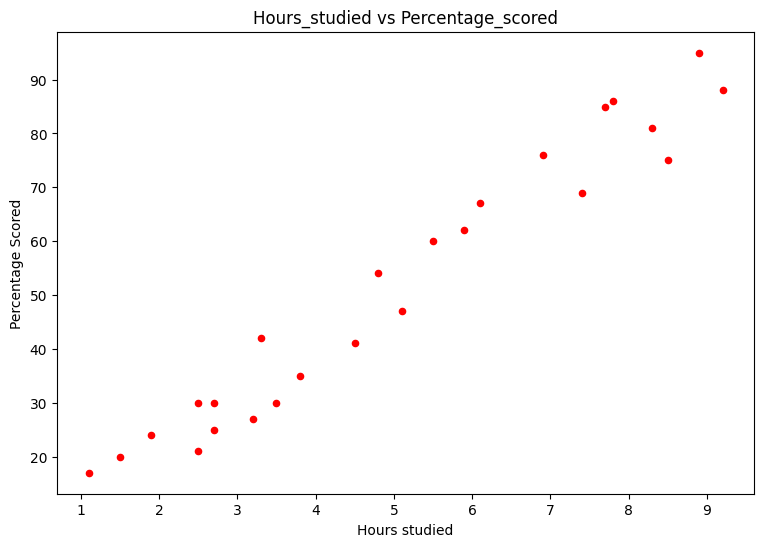

In [8]:
# Visualization through a scatter plot
df.plot(kind='scatter', x='Hours', y='Scores', figsize=(9, 6), color='r')
plt.title("Hours_studied vs Percentage_scored")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scored")
plt.show()


In [9]:
# Training and test data splitting
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1].values  # Independent variable (Hours)
y = df.iloc[:, 1].values  # Dependent variable (Scores)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=0)

In [10]:
# Training the linear regression algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training completed")

Training completed


In [11]:
# Coefficients and intercept of the linear regression line
print("Coefficient:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficient: [9.94167834]
Intercept: 1.932204253151646


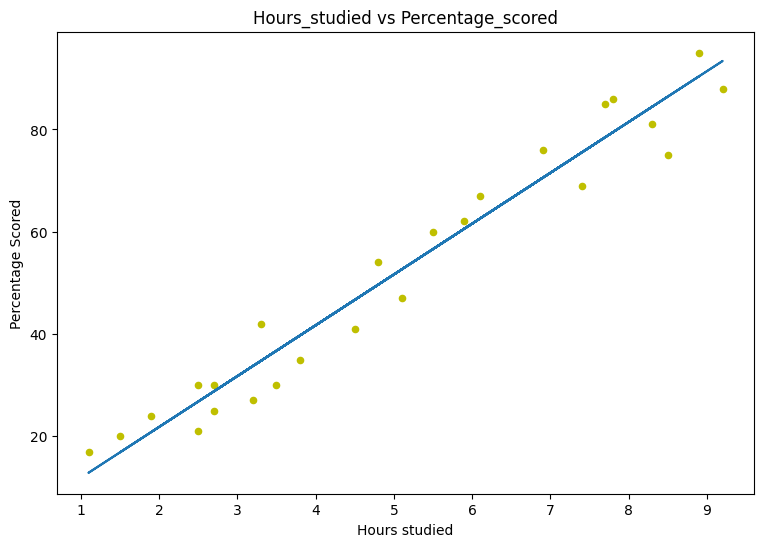

In [12]:
# Fitting the line over data in linear regression
line = regressor.coef_ * x + regressor.intercept_

df.plot(kind='scatter', x='Hours', y='Scores', figsize=(9, 6), color='y')
plt.plot(x, line)
plt.title("Hours_studied vs Percentage_scored")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scored")
plt.show()

In [16]:
# Predicting the dataset results
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Evaluating the model and calculating the accuracy using Mean Absolute Error
from sklearn import metrics
from sklearn.metrics import r2_score

b = metrics.mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R2 Score

print('Mean Absolute Error:', b)
print('R2 Score:', r2)

Mean Absolute Error: 4.130879918502486
R2 Score: 0.9367661043365055


In [14]:
# Finding the predicted score if a student studies 9.25 hours/day
hours = [[9.25]]  # Input hours
own_pred = regressor.predict(hours)
print("No of Hours =", hours[0][0])
print("Predicted Score =", own_pred[0])

No of Hours = 9.25
Predicted Score = 93.89272889341655


In [15]:
print("Completed the Task")

Completed the Task
